In [1]:
import os
import re
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import glob

plt.style.use('science')

In [2]:
# read through all files in correct_tilelang and assert that "speedup_ratio" is in file text
ratios = []
ratios_and_files = []
problem_best_kernels = {}  # Dictionary to track best kernel for each problem

path = "../src/prompts/correct_tilelang"
for level_dir in os.listdir(path):
    level_path = os.path.join(path, level_dir)
    if not os.path.isdir(level_path) or not level_dir.startswith("level"):
        continue
    
    count = 0
        
    for file in os.listdir(level_path):
        if not file.endswith(".py"):
            continue
            
        with open(os.path.join(level_path, file), "r") as f:
            data = f.read()
        
        if "speedup_ratio" not in data:
            print(f"speedup_ratio not found in {level_dir}/{file}")
            continue
            
        # Extract problem name from docstring
        problem_pattern = r'Problem Name: (.*)\n'
        problem_name = re.search(problem_pattern, data)
        if problem_name:
            problem_name = problem_name.group(1).strip()
        else:
            print(f"Problem name not found in {level_dir}/{file}")
            continue
                
        # Extract speedup ratio from the evaluation result line
        eval_line = [line for line in data.split('\n') if "speedup_ratio" in line][0]
        ratio = float(eval_line.split("speedup_ratio': ")[1].split("}")[0])

        # Track best kernel for each problem
        kernel_info = (ratio, f"{level_dir}/{file}", level_dir, problem_name)
        if problem_name not in problem_best_kernels or ratio > problem_best_kernels[problem_name][0]:
            problem_best_kernels[problem_name] = kernel_info

# Only keep the best kernel for each problem
ratios_and_files = list(problem_best_kernels.values())

# Print statistics
level_counts = {}
for _, _, level, _ in ratios_and_files:
    level_counts[level] = level_counts.get(level, 0) + 1

for level, count in sorted(level_counts.items()):
    print(f"Level {level}: {count} kernels")

print(f"Generated {len(ratios_and_files)} kernels")

Level level1: 85 kernels
Level level2: 93 kernels
Level level3: 36 kernels
Level level6: 71 kernels
Level level9: 1 kernels
Generated 286 kernels


In [3]:
# Set style for academic publication
# plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.size': 24,
    'axes.labelsize': 24,
    'axes.titlesize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'figure.titlesize': 24
})

In [4]:
def plotter(ratios, title='Distribution of Speedup Ratios', baseline=True, figsize=(12, 8)):
    # Create the plot with larger figure size
    plt.figure(figsize=figsize)

    # Create log-spaced bins for better resolution at lower values
    min_ratio = min(ratios)
    max_ratio = max(ratios)
    bins = np.logspace(np.log10(min_ratio), np.log10(max_ratio), 100)

    # Create histogram with improved styling
    plt.hist(ratios, bins=bins, edgecolor='black', alpha=0.7, 
             color='#3498db')

    # Customize the plot
    plt.xscale('log')
    # plt.title(title, fontweight='bold', pad=20)
    plt.xlabel('Speedup Ratio (log scale)', fontweight='bold')
    plt.ylabel('Number of Kernels', fontweight='bold')

    # Add grid for better readability
    plt.grid(True, which="both", ls="-", alpha=0.2)
    plt.grid(True, which="minor", ls=":", alpha=0.2)

    # Add vertical lines with improved styling
    mean_speedup = sum(ratios)/len(ratios)
    plt.axvline(x=mean_speedup, color='#e74c3c', linestyle='--', linewidth=2,
                label=f'Mean: {mean_speedup:.2f}x')
    
    if baseline:
        plt.axvline(x=1, linestyle='--', linewidth=2,
                    label='PyTorch Baseline', color='green')

    # Customize legend
    plt.legend(loc='upper right',
               frameon=True,
               framealpha=0.95,
               edgecolor='black')

    # Adjust layout and save with high DPI
    plt.tight_layout()
    plt.savefig(f"plots/speedup_distribution_{title}.png", dpi=300, bbox_inches='tight')

    plt.show()

    # Print summary statistics
    print(f"Number of kernels: {len(ratios)}")
    print(f"Mean speedup: {mean_speedup:.2f}x")
    print(f"Max speedup: {max(ratios):.2f}x")
    print(f"Min speedup: {min(ratios):.2f}x")

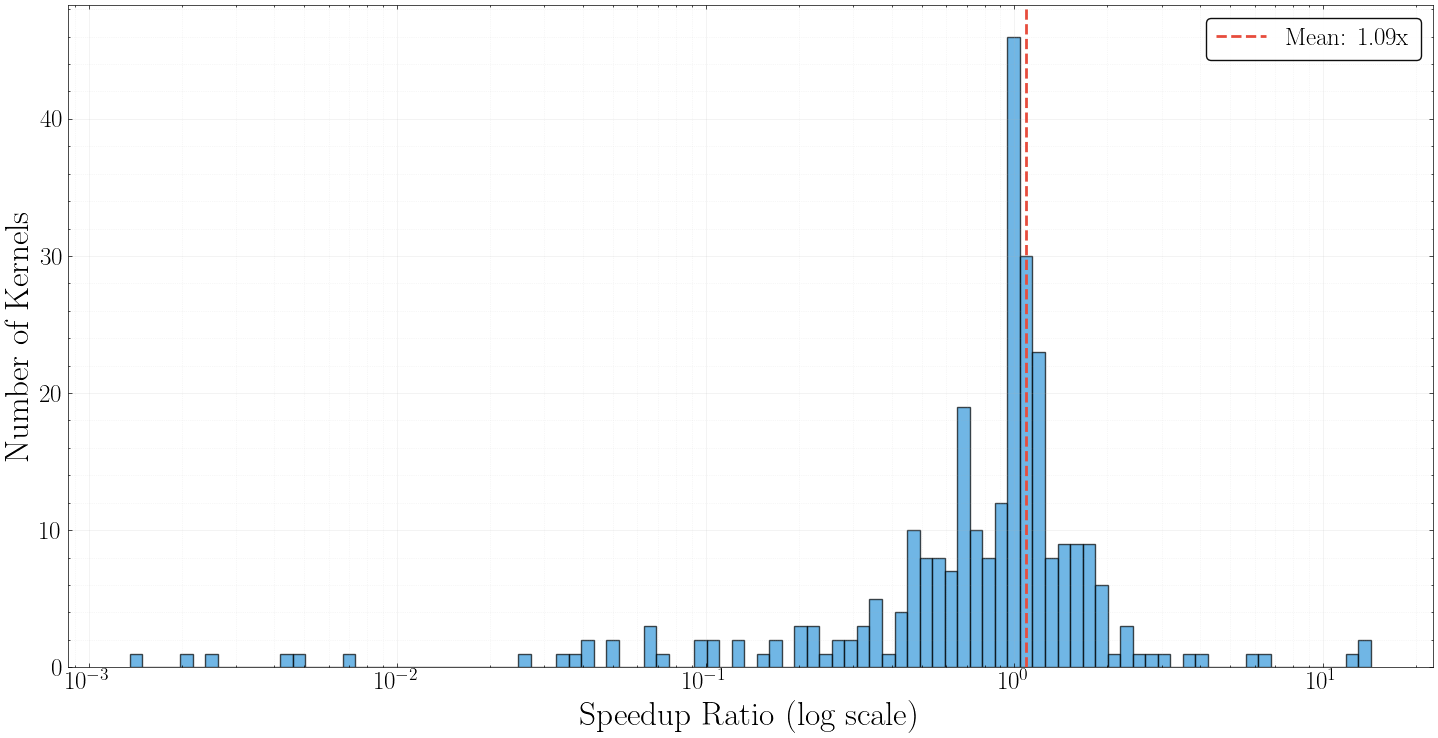

Number of kernels: 286
Mean speedup: 1.09x
Max speedup: 14.30x
Min speedup: 0.00x


In [18]:
ratios = [item[0] for item in ratios_and_files]
plotter(ratios, title="overall", baseline=False, figsize=(15, 8))

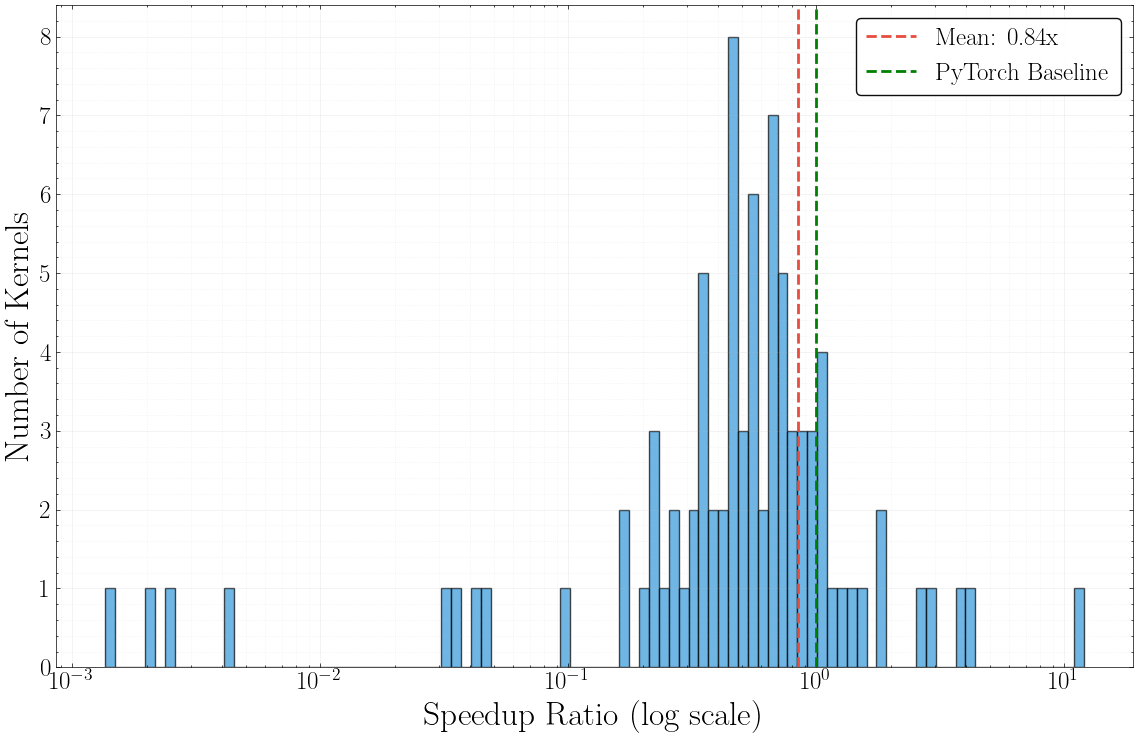

Number of kernels: 85
Mean speedup: 0.84x
Max speedup: 12.00x
Min speedup: 0.00x


In [6]:
l1_ratios = [item[0] for item in ratios_and_files if item[2] == "level1"]
plotter(l1_ratios, title="Level1", baseline=True)

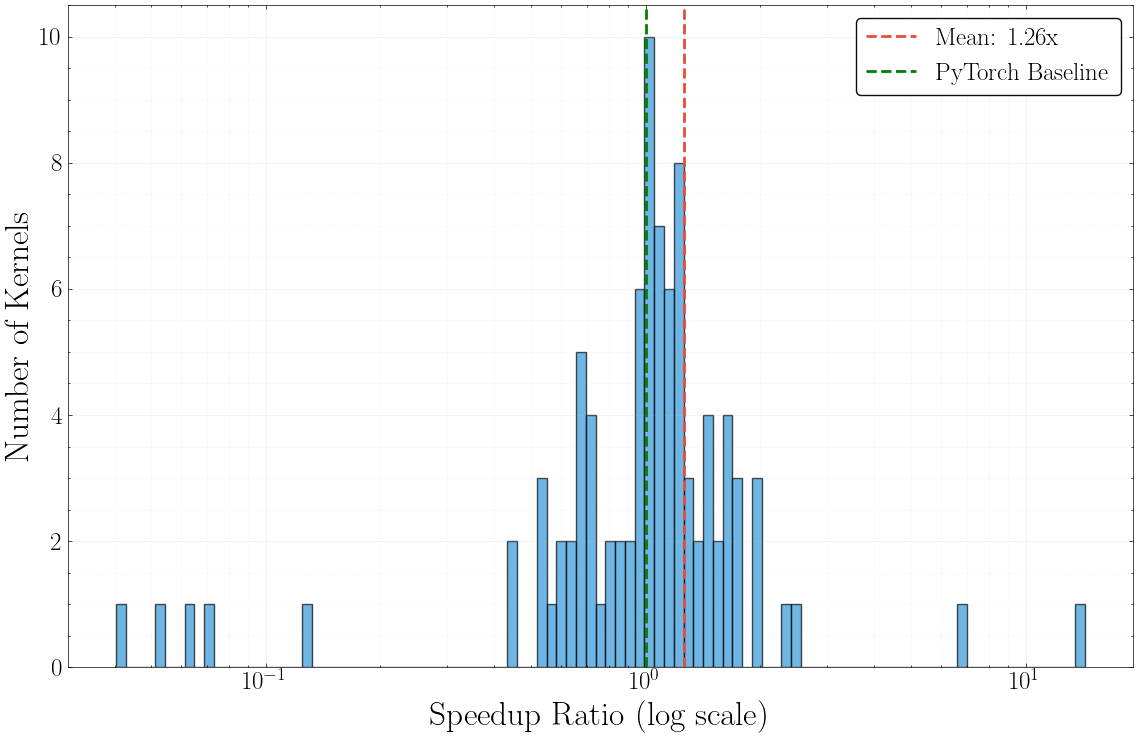

Number of kernels: 93
Mean speedup: 1.26x
Max speedup: 14.30x
Min speedup: 0.04x


In [7]:
l2_ratios = [item[0] for item in ratios_and_files if item[2] == "level2"]
plotter(l2_ratios, title="Level2", baseline=True)

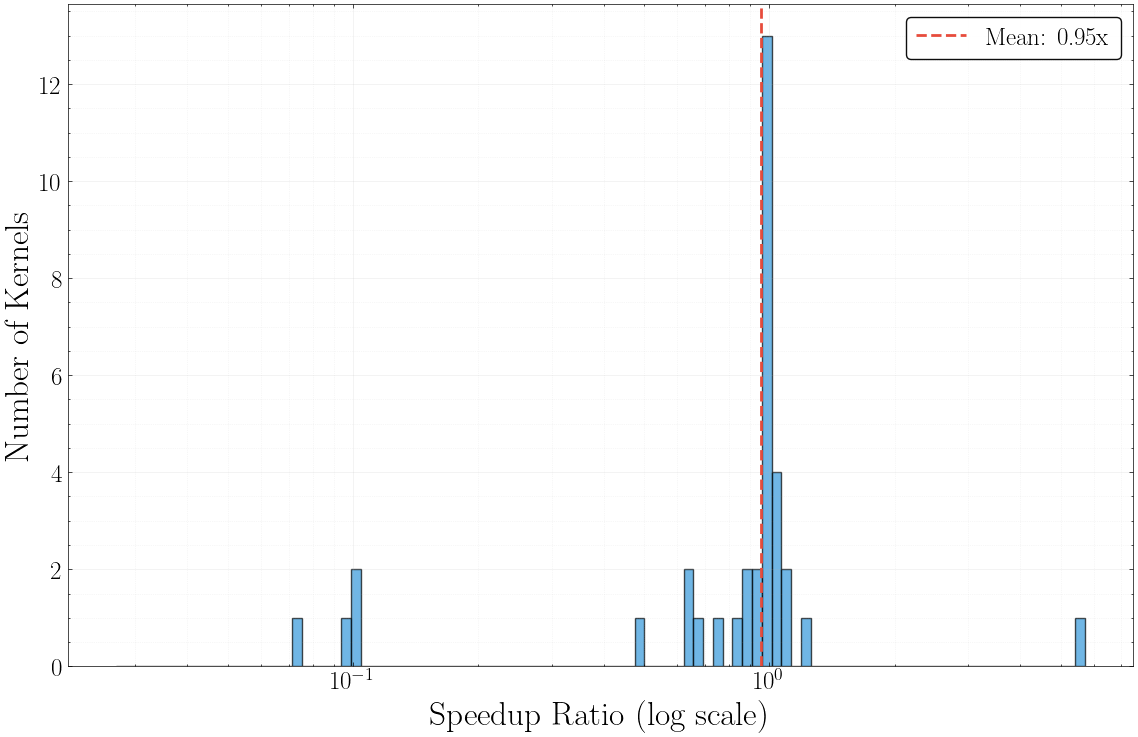

Number of kernels: 36
Mean speedup: 0.95x
Max speedup: 5.71x
Min speedup: 0.03x


In [8]:
l3_ratios = [item[0] for item in ratios_and_files if item[2] == "level3"]
plotter(l3_ratios, title="Level 3 Speedup Distribution", baseline=False)

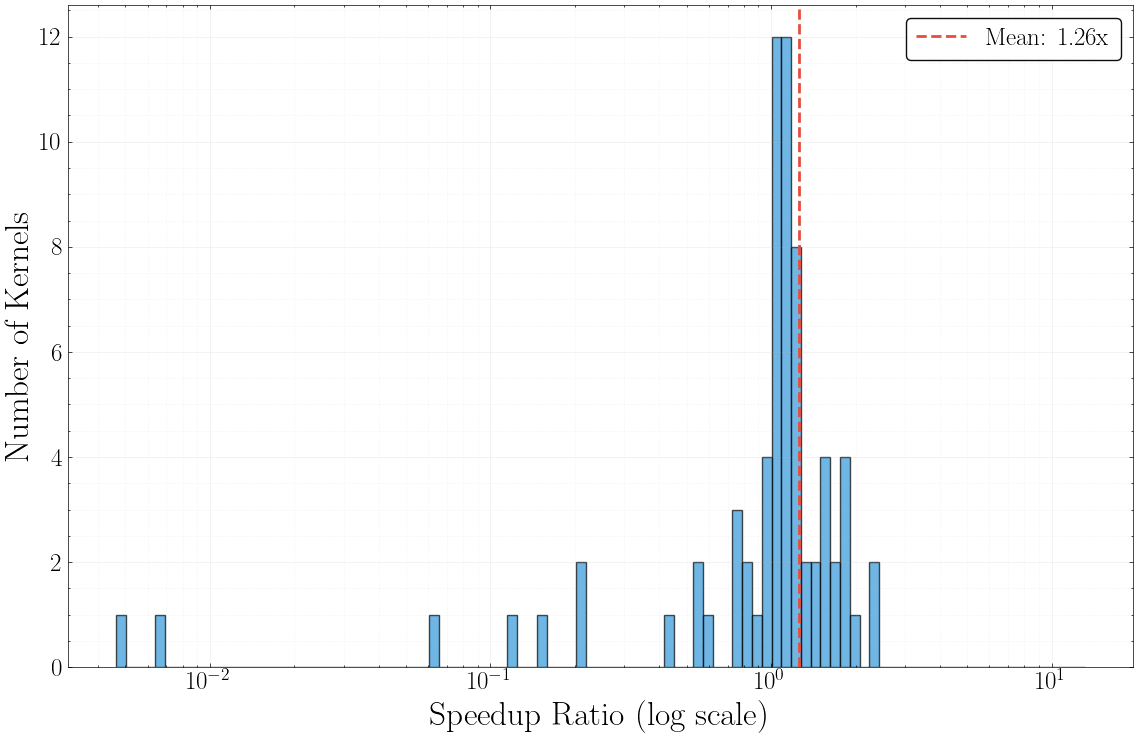

Number of kernels: 71
Mean speedup: 1.26x
Max speedup: 13.10x
Min speedup: 0.00x


In [9]:
l6_ratios = [item[0] for item in ratios_and_files if item[2] == "level6"]
plotter(l6_ratios, title="testset", baseline=False)

In [10]:
# sort the ratios and print the top 10
ratios_and_files.sort(key=lambda x: x[0], reverse=True)
for ratio, file, level_dir, problem_name in ratios_and_files[:20]:
    print(f"{ratio:.2f}x: {file} ({problem_name})")

14.30x: level2/2_13_cheat.py (13_ConvTranspose3d_Mean_Add_Softmax_Tanh_Scaling)
13.10x: level6/6_9.py (9_LayerNorm)
12.00x: level1/1_40.py (40_LayerNorm)
6.75x: level2/2_7.py (7_Conv3d_ReLU_LeakyReLU_GELU_Sigmoid_BiasAdd)
5.71x: level3/3_31.py (31_VisionAttention)
4.12x: level1/1_33.py (33_BatchNorm)
3.77x: level1/1_12.py (12_Matmul_with_diagonal_matrices_)
2.98x: level1/1_46.py (46_Average_Pooling_3D)
2.75x: level1/1_43.py (43_Max_Pooling_3D)
2.45x: level2/2_18.py (18_Matmul_Sum_Max_AvgPool_LogSumExp_LogSumExp)
2.41x: level2/2_40.py (40_Matmul_Scaling_ResidualAdd)
2.39x: level6/6_100.py (100_Conv3d_Mish_BatchNorm)
2.29x: level6/6_63.py (63_Conv3d_BatchNorm_Mish)
2.02x: level6/6_68.py (68_Matmul_Sum_HardSwish_LogSumExp_ResidualAdd_Hardtanh)
1.97x: level2/2_22.py (22_Matmul_Scale_ResidualAdd_Clamp_LogSumExp_Mish)
1.96x: level2/2_66.py (66_Matmul_Dropout_Mean_Softmax)
1.95x: level2/2_55.py (55_Matmul_MaxPool_Sum_Scale)
1.89x: level1/1_88.py (88_MinGPTNewGelu)
1.88x: level6/6_41.py (41_Co

In [11]:
# # Check each problem from 1-100 for each level
# import os
# import glob

# for level in [1, 2, 3]:
#     print(f"Level {level}:")

#     level_dir = f'../src/prompts/correct_tilelang/level{level}'

#     if not os.path.exists(level_dir):
#         continue
        
#     # Check each problem from 1 to 100
#     for problem_id in range(1, 101):
#         # Look for solution files
#         pattern = f'{level_dir}/{level}_{problem_id}.py'
#         solution_files = glob.glob(pattern)
        
#         # Check if problem is solved (has a correct solution)
#         is_solved = any(not any(x in f for x in ['wrong', 'cheat']) 
#                        for f in solution_files)
        
#         if not is_solved:
#             print(f"Problem {problem_id} is unsolved in {level_dir}")
        
#         # status = "✓" if is_solved else "✗"
#         # print(f"Problem {problem_id}: {status}")

In [12]:
# count the number of problems solved in each level
total = {
    1: 100,
    2: 100,
    3: 50,
    6: 100
}

counts = []
for level in [1, 2, 3, 6]:
    level_dir = f'../src/prompts/correct_tilelang/level{level}'
    if not os.path.exists(level_dir):
        continue
    
    count = 0
    for problem_id in range(1, 101):
        pattern = f'{level_dir}/{level}_{problem_id}.py'
        solution_files = glob.glob(pattern)
        
        pattern2 = f'{level_dir}/{level}_{problem_id}_*.py'
        solution_files2 = glob.glob(pattern2)
        
        solutions = solution_files + solution_files2
        if not solutions:
            continue
        count += 1
        
    print(f"Level {level}: {count} out of {total[level]} kernels ({int((count/total[level])*100)}%)")
    counts.append(count)

Level 1: 85 out of 100 kernels (85%)
Level 2: 93 out of 100 kernels (93%)
Level 3: 36 out of 50 kernels (72%)
Level 6: 72 out of 100 kernels (72%)


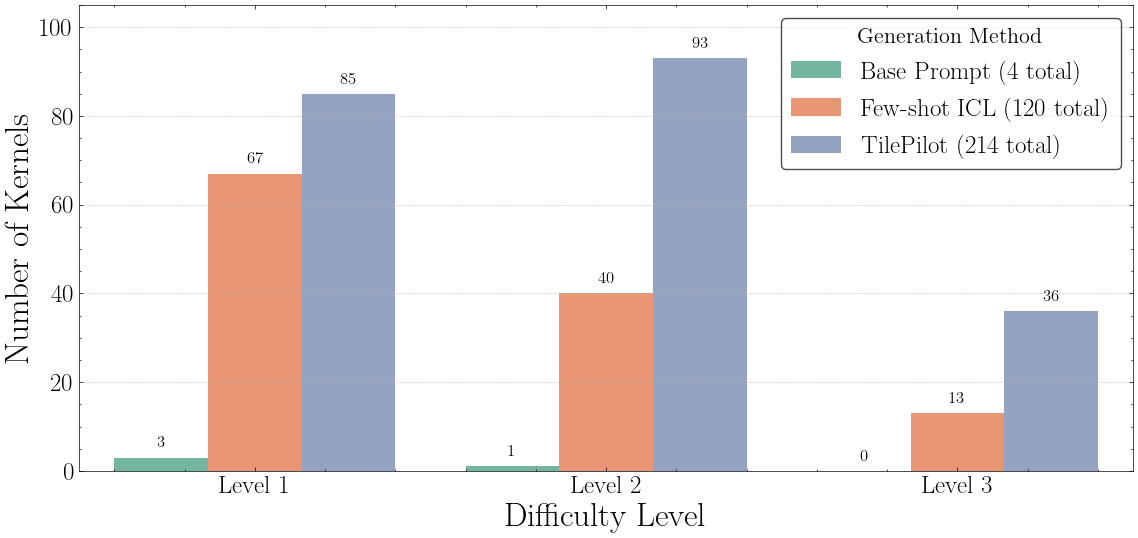

In [13]:
# Create data for the plot
data = {
    "Level": ["Level 1", "Level 2", "Level 3"] * 3,
    "Method": [f"Base Prompt ({3+1} total)"] * 3
    + [f"Few-shot ICL ({67+40+13} total)"] * 3
    + [f"TilePilot ({counts[0] + counts[1] + counts[2]} total)"] * 3,
    "Success Rate": [3, 1, 0, 67, 40, 13, counts[0], counts[1], counts[2]],
}

df = pd.DataFrame(data)

# Create the plot with larger figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plot with improved color palette
ax = sns.barplot(data=df, x="Level", y="Success Rate", hue="Method", palette="Set2")

# Customize the plot
# plt.title('Kernel Generation Success Rates by Method and Difficulty Level',
#           fontweight='bold', pad=20)
plt.xlabel("Difficulty Level", fontweight="bold")
plt.ylabel("Number of Kernels", fontweight="bold")
plt.ylim(0, 105)

# Add value labels on top of bars with improved formatting
for container in ax.containers:
    ax.bar_label(container, fmt="%d", padding=5, fontsize=12, fontweight="bold")

# Customize legend
plt.legend(
    title="Generation Method",
    title_fontsize=16,
    loc="upper right",
    frameon=True,
    framealpha=0.7,
    edgecolor="black",
)

# Add grid for better readability
plt.grid(True, axis="y", linestyle="--", alpha=0.7)

# Adjust layout and save with high DPI
plt.tight_layout()
plt.savefig("plots/kernel_success_rate.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

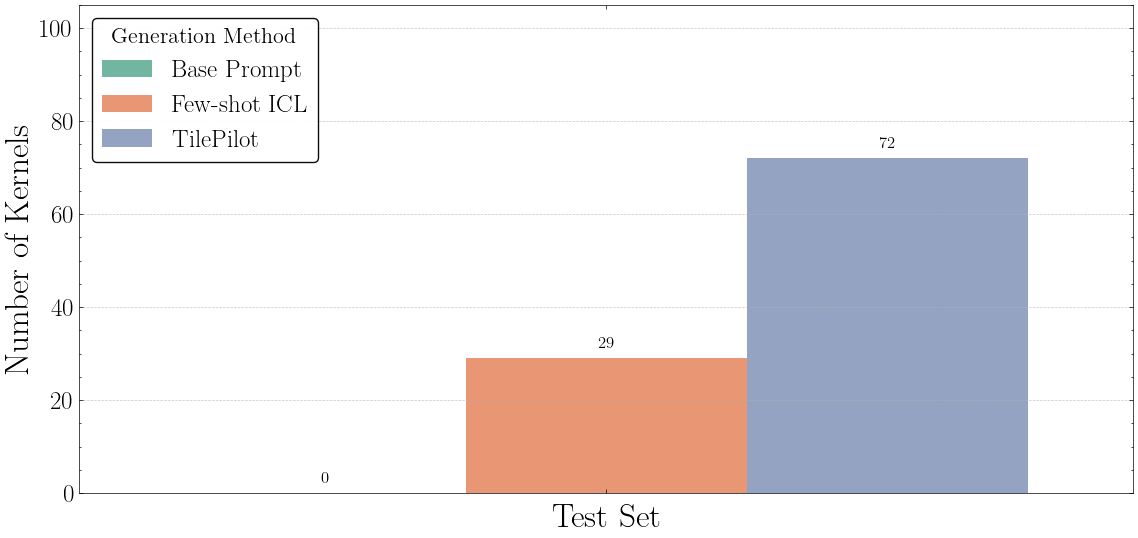

In [14]:
# Create data for the plot
data = {
    'Level': [''] * 3,
    'Method': ['Base Prompt'] + ['Few-shot ICL'] + ['TilePilot'],
    'Success Rate': [0, 29, counts[3]]
}

df = pd.DataFrame(data)

# Create the plot with larger figure size
plt.figure(figsize=(12, 6))

# Create grouped bar plot with improved color palette
ax = sns.barplot(data=df, x='Level', y='Success Rate', hue='Method', 
                 palette="Set2")

# Customize the plot
# plt.title('Kernel Generation Success Rates by Method and Difficulty Level', 
#           fontweight='bold', pad=20)
plt.xlabel('Test Set', fontweight='bold')
plt.ylabel('Number of Kernels', fontweight='bold')
plt.ylim(0, 105)

# Add value labels on top of bars with improved formatting
for container in ax.containers:
    ax.bar_label(container, fmt='%d', padding=5, fontsize=12, fontweight='bold')

# Customize legend
plt.legend(title='Generation Method', 
           title_fontsize=16,
           loc='upper left', 
           frameon=True,
           framealpha=0.95,
           edgecolor='black')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout and save with high DPI
plt.tight_layout()
plt.savefig("plots/kernel_success_rate_test_set.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [15]:
from collections import defaultdict

# count number of kernels with speedup > 1.0 for each level, tracking unique problems
stats = defaultdict(lambda: {'count': 0, 'count_gt_1': 0, 'sum': 0, 'min': float('inf'), 'max': float('-inf'), 'problems': set()})
overall_stats = {'count': 0, 'count_gt_1': 0, 'sum': 0, 'min': float('inf'), 'max': float('-inf'), 'problems': set()}

for ratio, file, level_dir, problem_name in ratios_and_files:
    # Only count each problem once
    if problem_name not in stats[level_dir]['problems']:
        if ratio > 1.0:
            stats[level_dir]['count_gt_1'] += 1
            overall_stats['count_gt_1'] += 1
        stats[level_dir]['count'] += 1
        overall_stats['count'] += 1
        stats[level_dir]['sum'] += ratio
        overall_stats['sum'] += ratio
        stats[level_dir]['min'] = min(stats[level_dir]['min'], ratio)
        overall_stats['min'] = min(overall_stats['min'], ratio)
        stats[level_dir]['max'] = max(stats[level_dir]['max'], ratio)
        stats[level_dir]['problems'].add(problem_name)
        overall_stats['problems'].add(problem_name)

for level_dir, stats in stats.items():
    print(f"{level_dir}: {stats['count']} unique problems, {stats['count_gt_1']} problems with speedup > 1.0, min: {stats['min']:.2f}, max: {stats['max']:.2f}, mean: {stats['sum']/stats['count']:.2f}")

print(f"Overall: {overall_stats['count']} unique problems, {overall_stats['count_gt_1']} problems with speedup > 1.0, min: {overall_stats['min']:.2f}, max: {overall_stats['max']:.2f}, mean: {overall_stats['sum']/overall_stats['count']:.2f}")

level2: 93 unique problems, 54 problems with speedup > 1.0, min: 0.04, max: 14.30, mean: 1.26
level6: 71 unique problems, 50 problems with speedup > 1.0, min: 0.00, max: 13.10, mean: 1.26
level1: 85 unique problems, 15 problems with speedup > 1.0, min: 0.00, max: 12.00, mean: 0.84
level3: 36 unique problems, 9 problems with speedup > 1.0, min: 0.03, max: 5.71, mean: 0.95
level9: 1 unique problems, 0 problems with speedup > 1.0, min: 0.30, max: 0.30, mean: 0.30
Overall: 286 unique problems, 128 problems with speedup > 1.0, min: 0.00, max: -inf, mean: 1.09


In [16]:
with open("kb_leaderboard.txt", "r") as f:
    kb_leaderboard = f.read()

from collections import defaultdict

lines = []
for line in kb_leaderboard.split("\n"):
    if "Level" in line:
        lines.append(line)

level_stats = defaultdict(lambda: {'count': 0, 'count_gt_1': 0, 'sum': 0, 'min': float('inf'), 'max': float('-inf')})

for line in lines:
    line = line.split("\t")
    # print(line)
    level = line[0].split(":")[0]
    
    speedup_str = line[1].split(" ")[0]
    if not speedup_str:
        continue

    speedup = float(speedup_str)
    
    level_stats[level]['count'] += 1
    level_stats[level]['sum'] += speedup
    level_stats[level]['min'] = min(level_stats[level]['min'], speedup)
    level_stats[level]['max'] = max(level_stats[level]['max'], speedup)
    if speedup > 1.0:
        level_stats[level]['count_gt_1'] += 1

for level, stats in level_stats.items():
    print(f"{level}: {stats['count']} kernels, {stats['count_gt_1']} kernels with speedup > 1.0, min: {stats['min']:.2f}, max: {stats['max']:.2f}, mean: {stats['sum']/stats['count']:.2f}")

Level 1: 65 kernels, 13 kernels with speedup > 1.0, min: 0.01, max: 13.22, mean: 0.88
Level 2: 65 kernels, 34 kernels with speedup > 1.0, min: 0.15, max: 7.08, mean: 1.18
Level 3: 26 kernels, 4 kernels with speedup > 1.0, min: 0.01, max: 1.32, mean: 0.82


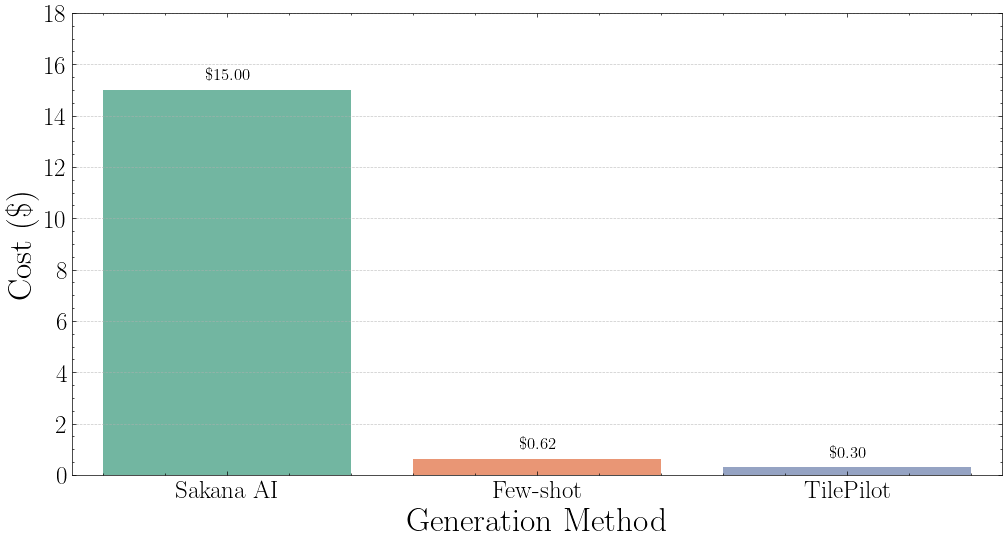

In [17]:
# Create DataFrame for seaborn
data = pd.DataFrame({
    'Method': ['Sakana AI', 'Few-shot', 'TilePilot'],
    'Cost': [15.0, 0.62, 0.30]
})

# Create the plot with larger figure size
plt.figure(figsize=(12, 6))

# Create bar plot with improved color palette
ax = sns.barplot(data=data, x='Method', y='Cost',  hue='Method', palette="Set2")

# Customize the plot
plt.xlabel('Generation Method', fontweight='bold')
plt.ylabel('Cost (\$)', fontweight='bold')
plt.ylim(0, 18)

# Add value labels on top of bars with improved formatting
for container in ax.containers:
    ax.bar_label(container, fmt='\$%.2f', padding=5, fontsize=12, fontweight='bold')

# Add grid for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout and save with high DPI
# plt.tight_layout()
plt.savefig("plots/cost_comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
